## 1. Data Preparation

In [61]:
# sentiment
categories = ['nostalgia', 'not nostalgia']

In [3]:
import pandas as pd

df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")

In [4]:
print(df)

          sentiment                                            comment
0     not nostalgia  He was a singer with a golden voice that I lov...
1         nostalgia  The mist beautiful voice ever I listened to hi...
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4         nostalgia  listening to his songs reminds me of my mum wh...
...             ...                                                ...
1495  not nostalgia  i don't know!..but the opening of the video,.....
1496  not nostalgia  it's sad this is such a beautiful song when yo...
1497  not nostalgia  Dear Friend, I think age and time is not that ...
1498      nostalgia  I was born in 1954 and started to be aware of ...
1499      nostalgia  This is the first CD I bought after my marriag...

[1500 rows x 2 columns]


In [28]:
# my functions
import helpers_homework.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame(dmh.format_rows(df), columns=['sentiment_name', 'comment'])

# 檢查格式化後的數據
print(X)

     sentiment_name                                            comment
0     not nostalgia  He was a singer with a golden voice that I lov...
1         nostalgia  The mist beautiful voice ever I listened to hi...
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4         nostalgia  listening to his songs reminds me of my mum wh...
...             ...                                                ...
1495  not nostalgia  i don't know!..but the opening of the video,.....
1496  not nostalgia  it's sad this is such a beautiful song when yo...
1497  not nostalgia  Dear Friend, I think age and time is not that ...
1498      nostalgia  I was born in 1954 and started to be aware of ...
1499      nostalgia  This is the first CD I bought after my marriag...

[1500 rows x 2 columns]


In [29]:
X['sentiment'] = X['sentiment_name'].apply(lambda t: dmh.format_labels_number(t, X))
X = X[['sentiment','comment', 'sentiment_name']]

In [30]:
X[0:10]

,sentiment,comment,sentiment_name
0,1,He was a singer with a golden voice that I lov...,not nostalgia
1,0,The mist beautiful voice ever I listened to hi...,nostalgia
2,0,I have most of Mr. Reeves songs. Always love ...,nostalgia
3,1,30 day leave from 1st tour in Viet Nam to conv...,not nostalgia
4,0,listening to his songs reminds me of my mum wh...,nostalgia
5,0,"Every time I heard this song as a child, I use...",nostalgia
6,0,"My dad loved listening to Jim Reeves, when I w...",nostalgia
7,0,i HAVE ALSO LISTENED TO Jim Reeves since child...,nostalgia
8,1,Wherever you are you always in my heart,not nostalgia
9,1,Elvis will always be number one no one can com...,not nostalgia


## 2. Data Mining 

### 2.1 Missing Values

In [31]:
X.isnull()

,sentiment,comment,sentiment_name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1495,False,False,False
1496,False,False,False
1497,False,False,False
1498,False,False,False


In [32]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment,sentiment_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### 2.2 Dealing with Duplicate Data

In [33]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [34]:
sum(X.duplicated())

1

In [35]:
X[X.duplicated(keep=False)]

,sentiment,comment,sentiment_name
62,1,never heard this song before... WOW What an am...,not nostalgia
78,1,never heard this song before... WOW What an am...,not nostalgia


In [52]:
X.drop_duplicates(keep='first', inplace=True) #刪除重複的行，保留第一次出現的
X.reset_index(drop=True, inplace=True) # 從新排列索引

In [53]:
X.iloc[78]

sentiment                                                         0
comment           How good it was back then we had it all !The M...
sentiment_name                                            nostalgia
Name: 78, dtype: object

In [54]:
len(X)

1499

## 3. Data Processing

### 3.1 Sampling

In [56]:
X_sample = X.sample(n = 750) # random state

In [57]:
len(X_sample)

750

In [58]:
X_sample[0:4]

,sentiment,comment,sentiment_name
346,0,Definitely reminds me of school dance!,nostalgia
705,1,A beautiful sad romantic love song,not nostalgia
147,0,My mum had this song on tape when I was a kid ...,nostalgia
595,1,My 5 year old daughter and I dance to this son...,not nostalgia


In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
categories

['nostalgia', 'not nostalgia']

sentiment_name
nostalgia        750
not nostalgia    749
Name: count, dtype: int64


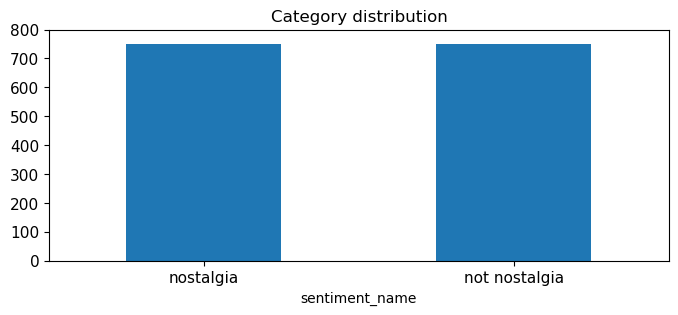

In [72]:
print(X.sentiment_name.value_counts())

# plot barchart for X
upper_bound = max(X.sentiment_name.value_counts()) + 50
X.sentiment_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (8,3))
# rot是下面標籤轉的幅度
plt.show()

sentiment_name
nostalgia        375
not nostalgia    375
Name: count, dtype: int64


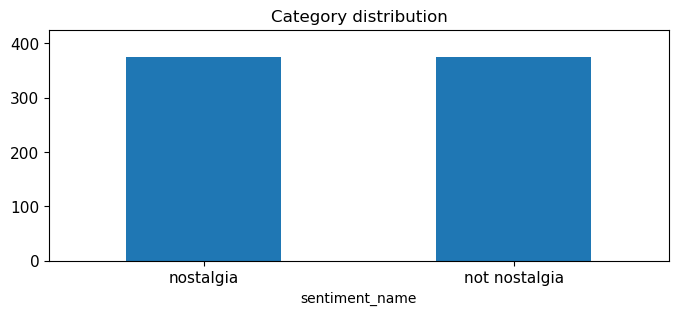

In [73]:
print(X_sample.sentiment_name.value_counts())

# plot barchart for X
upper_bound = max(X_sample.sentiment_name.value_counts()) + 50
X_sample.sentiment_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 11, figsize = (8,3))
# rot是下面標籤轉的幅度
plt.show()

Comment: 可以看見兩個類別的分布是 1:1 ，在整體的會分懷舊少一筆主要原因是因為有重複的資料進行了移除

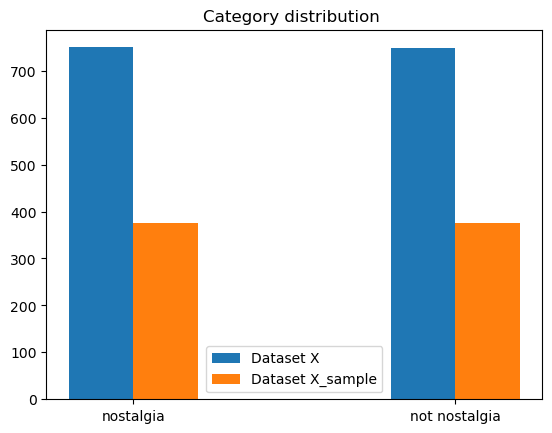

In [75]:
# 計算兩個 dataset 的類別統計
X_counts = X.sentiment_name.value_counts()
X_sample_counts = X_sample.sentiment_name.value_counts()

# 找到所有的類別，並確保兩組資料對齊
all_categories = X_counts.index

# 設定 bar 寬度和位置
bar_width = 0.2
index = range(len(all_categories))

# 繪製第一組資料的柱狀圖
plt.bar(index, X_counts, bar_width, label='Dataset X')

# 繪製第二組資料的柱狀圖，並將其向右偏移
plt.bar([i + bar_width for i in index], X_sample_counts, bar_width, label='Dataset X_sample')

# 設定標題和標籤
plt.title('Category distribution ')
plt.xticks([i + bar_width / 2 for i in index],all_categories, rotation=0)

# 添加圖例
plt.legend()

# 顯示圖表
plt.show()

### 3.2 Feature Creation

In [76]:
import nltk

In [78]:
# takes a like a minute or two to process
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))

In [79]:
X[0:4]["unigrams"]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

In [80]:
X[0:4]

,sentiment,comment,sentiment_name,unigrams
0,1,He was a singer with a golden voice that I lov...,not nostalgia,"[He, was, a, singer, with, a, golden, voice, t..."
1,0,The mist beautiful voice ever I listened to hi...,nostalgia,"[The, mist, beautiful, voice, ever, I, listene..."
2,0,I have most of Mr. Reeves songs. Always love ...,nostalgia,"[I, have, most, of, Mr., Reeves, songs, ., Alw..."
3,1,30 day leave from 1st tour in Viet Nam to conv...,not nostalgia,"[30, day, leave, from, 1st, tour, in, Viet, Na..."


In [82]:
list(X[0:1]['unigrams'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

### 3.3 Feature subset selection

In [87]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment)
print(X_counts[0])

  (0, 1598)	1
  (0, 3570)	2
  (0, 2973)	1
  (0, 3650)	1
  (0, 1470)	1
  (0, 3534)	1
  (0, 3282)	1
  (0, 2028)	1
  (0, 3336)	1
  (0, 1606)	1
  (0, 233)	2
  (0, 3284)	3
  (0, 3328)	2
  (0, 1651)	2
  (0, 1512)	1
  (0, 1249)	1
  (0, 323)	1
  (0, 214)	1
  (0, 2341)	1
  (0, 15)	1
  (0, 1733)	1
  (0, 3304)	1
  (0, 907)	1
  (0, 258)	2
  (0, 3124)	1
  (0, 2328)	2
  (0, 245)	1
  (0, 3581)	1
  (0, 1591)	1
  (0, 2082)	1
  (0, 2974)	1
  (0, 573)	1
  (0, 593)	1
  (0, 3538)	1
  (0, 1347)	2
  (0, 1833)	1
  (0, 2671)	1
  (0, 3713)	2
  (0, 1272)	1
  (0, 2688)	1
  (0, 1125)	1
  (0, 2035)	1
  (0, 3278)	1
  (0, 2018)	1
  (0, 1964)	1


In [96]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

In [97]:
analyze(X.comment[0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [99]:
X_counts.shape

(1499, 3730)

In [100]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [101]:
X_counts[0:5, 0:100].toarray() #提取出前五篇文檔（行）和在前 100 個特徵（列）的狀況

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [102]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [107]:
# Answer here
import numpy as np

X_counts[0:1, 0:100].toarray()

#使用numpy找出非0的那一列
indices = np.nonzero(X_counts[0:1, 0:100].toarray())[1]

# 提取詞彙表中的對應詞
count_vect.get_feature_names_out()[indices]

array(['16years'], dtype=object)

In [108]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [109]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [111]:
plot_z = X_counts[0:20, 0:20].toarray() # X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

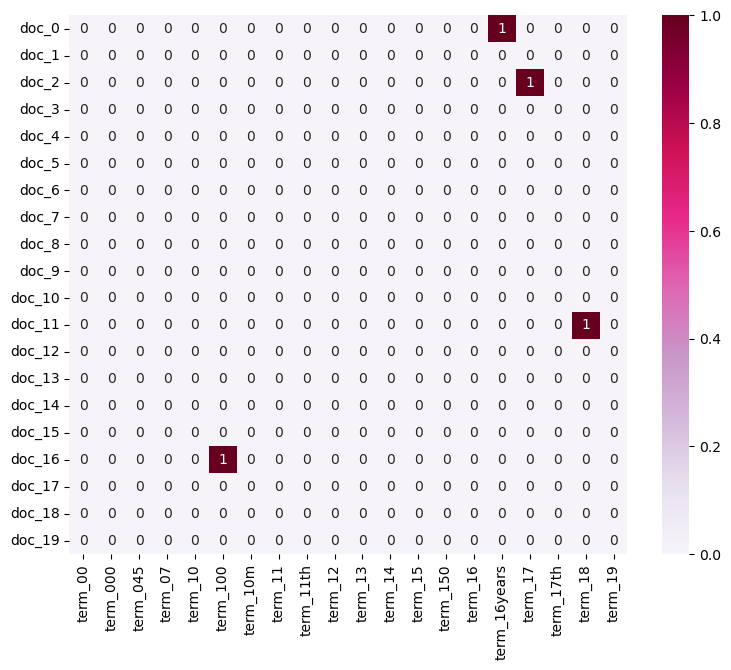

In [112]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd", #熱圖的顏色映射為粉紅色調
                 vmin=0, vmax=1, annot=True) #annot 熱圖的每個格子中顯示數據值
plt.show()

In [137]:
# 計算每一特徵在所有文檔中出現的次數
feature_counts = X_counts.sum(axis=0).A1

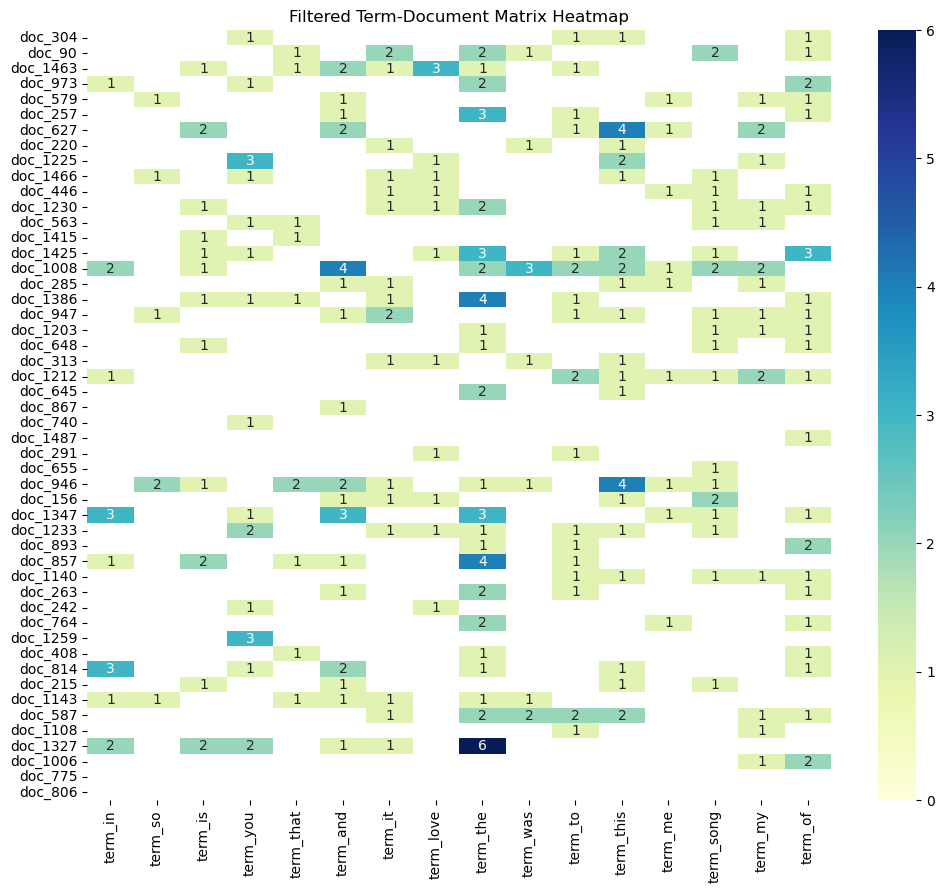

In [138]:
#  Answer here
# 1.藉由從所有資料集中選定較常出現的特徵以及得到比較有用的視覺化圖形
# 2.並且擴大資料選擇的範圍

# 訂定希望出現幾次以上的特徵
threshold = 300

selected_features = np.where(feature_counts >= threshold)[0]

num_docs = X_counts.shape[0] 
num_features = selected_features.size

random_doc_indices = np.random.choice(num_docs, size=50,replace=False)

if num_features > 0:  # 確保有 > threshold 的特徵
    random_feature_indices = np.random.choice(selected_features, size=min(60,num_features), replace=False)

    # 建構數據
    plot_x = ["term_" + str(i) for i in count_vect.get_feature_names_out()[random_feature_indices]]
    plot_y = ["doc_" + str(i) for i in random_doc_indices]
    plot_z = X_counts[random_doc_indices][:, random_feature_indices].toarray()

    df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

    # 繪製熱圖
    mask = (plot_z == 0)

    plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(df_todraw, mask=mask, cmap="YlGnBu", vmin=0, annot=True)
    plt.title("Filtered Term-Document Matrix Heatmap")
    plt.show()

### 3.4 Attribute Transformation / Aggregation

In [140]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
term_frequencies = np.asarray(X_counts.sum(axis=0))[0] # 列的方向進行計算

# 計算每一特徵在所有文檔中出現的次數
# 與上方功能相同
# feature_counts = X_counts.sum(axis=0).A1

In [141]:
term_frequencies

array([1, 2, 1, ..., 1, 1, 1], dtype=int64)

In [143]:
term_frequencies[0] # sum of first term: 00

1

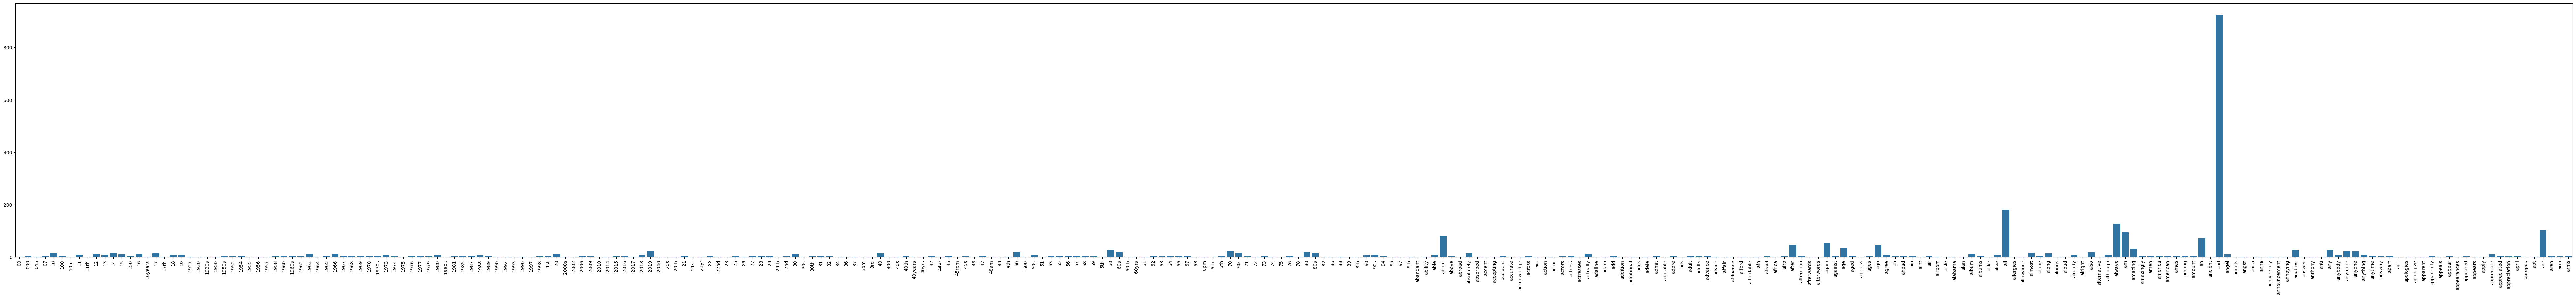

In [145]:
plt.close() # 關掉先前的
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticks(range(300))  # 設置 x 軸的刻度位置
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);
plt.show()

In [146]:
# 找到最大頻率的索引
max_index = np.argmax(term_frequencies)
# 獲取對應的詞彙
max_frequency_word = count_vect.get_feature_names_out()[max_index]
# 找到最大頻率值
max_frequency_value = term_frequencies[max_index]
print(f"最大頻率的詞: '{max_frequency_word}'，出現次數: {max_frequency_value}")

最大頻率的詞: 'the'，出現次數: 1351


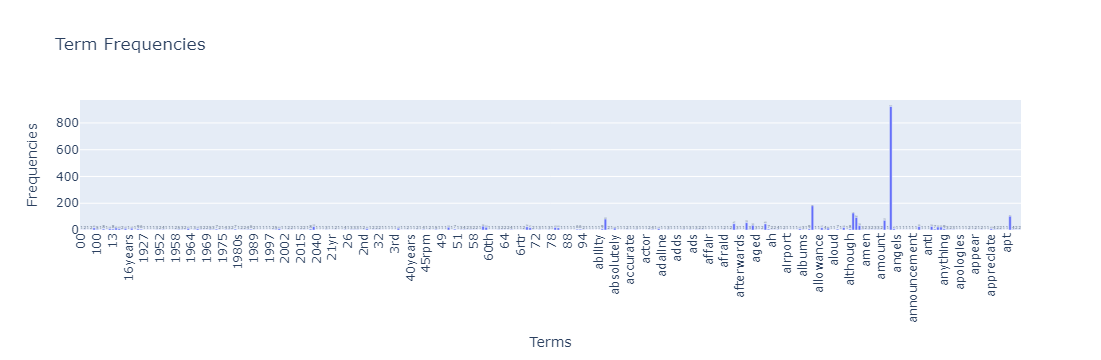

In [149]:
# 提供更好觀察的圖表
import plotly.express as px
import pandas as pd

# 準備數據
terms = count_vect.get_feature_names_out()[:300]  # 獲得前300個特徵
frequencies = term_frequencies[:300]  # 獲得前300個特徵的頻率
data = pd.DataFrame({'Terms': terms, 'Frequencies': frequencies})  # 創建 DataFrame

# 創建互動式條形圖
fig = px.bar(data, x='Terms', y='Frequencies', title='Term Frequencies', text='Frequencies')

# 更新圖表佈局
fig.update_traces(texttemplate='%{text}', textposition='outside')  # 將頻率標籤放置在條形外部
fig.update_layout(xaxis_tickangle=-90)  # 旋轉 x 軸標籤

# 顯示圖形
fig.show()

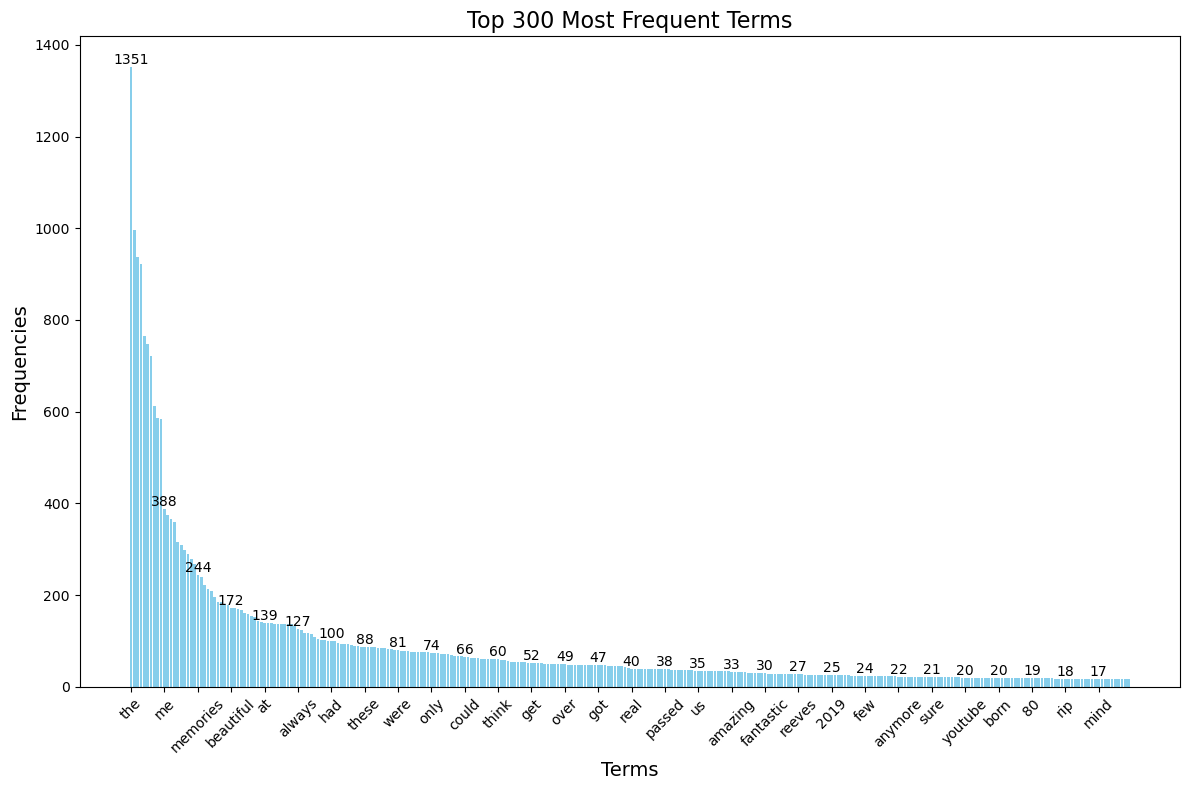

In [161]:
plt.close() # 關掉先前的
import pandas as pd
import matplotlib.pyplot as plt

# 準備數據
terms = count_vect.get_feature_names_out()  # 獲得所有特徵
frequencies = term_frequencies  # 獲得所有特徵的頻率
data = pd.DataFrame({'Terms': terms, 'Frequencies': frequencies})  # 創建 DataFrame

# 選擇出現次數前300高的
top_data = data.nlargest(300, 'Frequencies').sort_values(by='Frequencies', ascending=False)

# 創建條形圖
plt.figure(figsize=(12, 8))  # 設置圖形大小
plt.bar(top_data['Terms'], top_data['Frequencies'], color='skyblue')  # 繪製條形圖

# 添加標題和標籤
plt.title('Top 300 Most Frequent Terms', fontsize=16)
plt.xlabel('Terms', fontsize=14)
plt.ylabel('Frequencies', fontsize=14)

# 旋轉 x 軸標籤以便於顯示
plt.xticks(rotation=90)

# 顯示頻率標籤，每 20 個顯示一次
interval = 10  # 設定顯示間隔
for index, value in enumerate(top_data['Frequencies']):
    if index % interval == 0:  # 每隔 interval 顯示一次
        plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

# 每隔一定數量顯示一個標籤
plt.xticks(ticks=range(0, len(top_data['Terms']), 10), labels=top_data['Terms'][::10], rotation=45)

# 顯示圖形
plt.tight_layout()  # 自動調整佈局以避免重疊
plt.show()


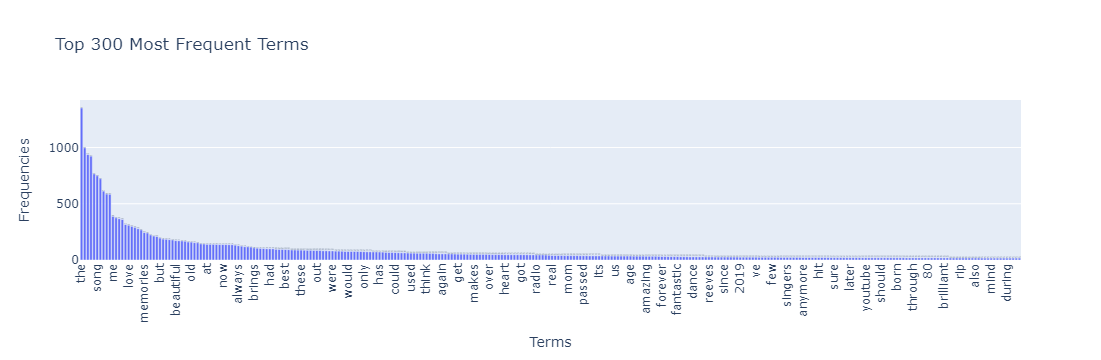

In [167]:
#動態的更加清楚好懂

# 準備數據
terms = count_vect.get_feature_names_out() # 獲得所有特徵
frequencies = term_frequencies  # 獲得所有特徵的頻率
data = pd.DataFrame({'Terms': terms, 'Frequencies': frequencies})  # 創建 DataFrame

top_data = data.nlargest(300, 'Frequencies').sort_values(by='Frequencies', ascending=False) # 選擇出現次數前50高的

# 創建互動式條形圖
fig = px.bar(top_data, x='Terms', y='Frequencies', title='Top 300 Most Frequent Terms', text='Frequencies')

# 更新圖表佈局
fig.update_traces(texttemplate='%{text}', textposition='outside')  # 將頻率標籤放置在條形外部
fig.update_layout(xaxis_tickangle=-90)  # 旋轉 x 軸標籤

# 顯示圖形
fig.show()

In [166]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

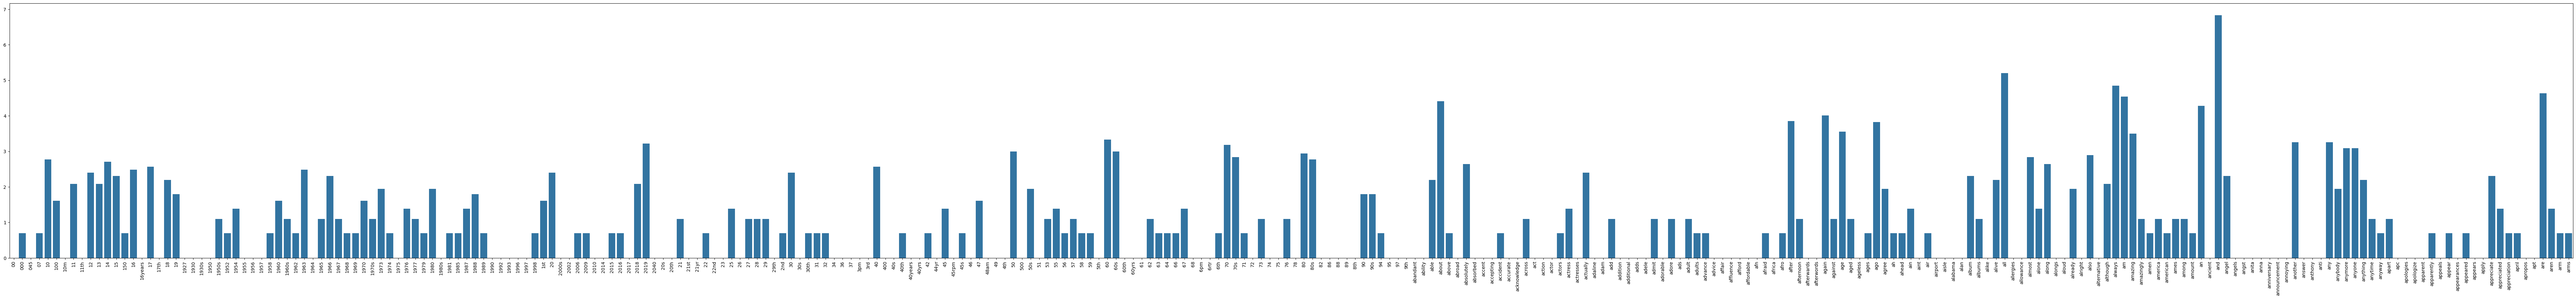

In [168]:
plt.close()
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticks(range(300))  # 設置 x 軸的刻度位置
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);
plt.show()

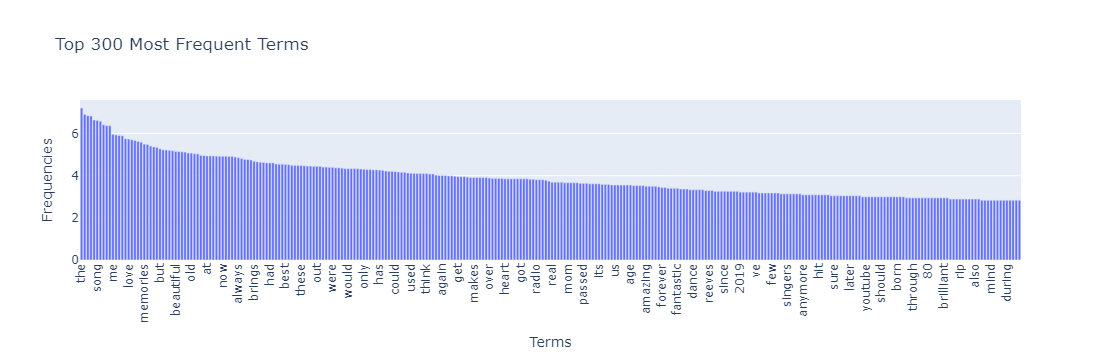

In [169]:

# 準備數據
terms = count_vect.get_feature_names_out() # 獲得所有特徵
frequencies = term_frequencies  # 獲得所有特徵的頻率
term_frequencies_log = [math.log(i) for i in term_frequencies]
data = pd.DataFrame({'Terms': terms, 'Frequencies': term_frequencies_log})  # 創建 DataFrame

top_data = data.nlargest(300, 'Frequencies').sort_values(by='Frequencies', ascending=False) # 選擇出現次數前50高的

# 創建互動式條形圖
fig = px.bar(top_data, x='Terms', y='Frequencies', title='Top 300 Most Frequent Terms', text='Frequencies')

# 更新圖表佈局
fig.update_traces(texttemplate='%{text}', textposition='outside')  # 將頻率標籤放置在條形外部
fig.update_layout(xaxis_tickangle=-90)  # 旋轉 x 軸標籤

# 顯示圖形
fig.show()

# 可以發現log將頻率進行壓縮，並且使數據的坡度更加平滑，不像之前的差異極度巨大

Finding frequent patterns